In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_learning_topics/ForecastingModels/Amtrak.csv')
df.head()

,Month,Ridership
0,1/1/1991,1708.917
1,1/2/1991,1620.586
2,1/3/1991,1972.715
3,1/4/1991,1811.665
4,1/5/1991,1974.964


In [4]:
df.describe(include='all')

,Month,Ridership
count,159,159.000000
unique,159,NaN
top,1/1/1991,NaN
freq,1,NaN
mean,NaN,1822.197208
std,NaN,181.636034
min,NaN,1360.852000
25%,NaN,1698.564500
50%,NaN,1831.049000
75%,NaN,1966.957500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [5]:
df

,Month,Ridership
0,1/1/1991,1708.917
1,1/2/1991,1620.586
2,1/3/1991,1972.715
3,1/4/1991,1811.665
4,1/5/1991,1974.964
...,...,...
154,1/11/2003,2076.054
155,1/12/2003,2140.677
156,1/1/2004,1831.508
157,1/2/2004,1838.006


In [6]:
# Convert data to time series
df['Date'] = pd.to_datetime(df.Month, format='%d/%m/%Y')
rider_ts = pd.Series(df.Ridership.values,index=df.Date,name='Ridership')

In [7]:
# Display the time series data
rider_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, Length: 159, dtype: float64

In [8]:
# Plot the time series
# Check for trends or seasonality
import matplotlib.pylab as plt

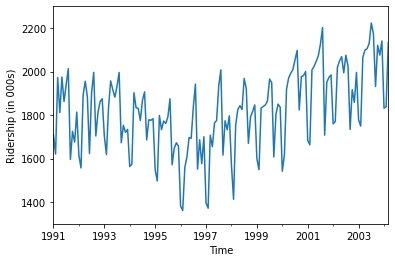

In [9]:
ax = rider_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300,2300)
plt.show()

In [12]:
# Data partition for the time series data
# Keep the last three years data as the validation dataset
nValid = 36
nTrain = len(rider_ts) - nValid
train_ts = rider_ts[:nTrain]
valid_ts = rider_ts[nTrain:]

In [13]:
# Display the training dataset
train_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2000-11-01    1981.408
2000-12-01    2000.153
2001-01-01    1683.148
2001-02-01    1663.404
2001-03-01    2007.928
Name: Ridership, Length: 123, dtype: float64

In [14]:
# Model 1: A linear trend time series model
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools

In [15]:
ts_df = tsatools.add_trend(rider_ts,trend='ct')
ts_df['Month']=ts_df.index.month

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
nValid = 36
nTrain = len(rider_ts) - nValid
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]
rider_lm = sm.ols(formula='Ridership ~ trend',data=train_df).fit()

In [17]:
# Display updated df
ts_df

,Ridership,const,trend,Month
Date,,,,
1991-01-01,1708.917,1.0,1.0,1
1991-02-01,1620.586,1.0,2.0,2
1991-03-01,1972.715,1.0,3.0,3
1991-04-01,1811.665,1.0,4.0,4
1991-05-01,1974.964,1.0,5.0,5
...,...,...,...,...
2003-11-01,2076.054,1.0,155.0,11
2003-12-01,2140.677,1.0,156.0,12
2004-01-01,1831.508,1.0,157.0,1


In [19]:
# Display the linear model result
print(rider_lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Fri, 30 Dec 2022   Prob (F-statistic):              0.390
Time:                        17:36:15   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.0

In [21]:
# Evaluate Model1 performance
! pip install dmba
from dmba import regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
predict_lm = rider_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)


Regression statistics

                      Mean Error (ME) : 193.1316
       Root Mean Squared Error (RMSE) : 239.4863
            Mean Absolute Error (MAE) : 209.4371
          Mean Percentage Error (MPE) : 9.2099
Mean Absolute Percentage Error (MAPE) : 10.1477


In [23]:
# Model 2: A polynomial trend time series model
import numpy as np

In [24]:
rider_lm_poly = sm.ols(formula='Ridership ~ trend + np.square(trend)',data=train_df).fit()

In [25]:
# Display the polynomial trend model result
print(rider_lm_poly.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     10.58
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           5.84e-05
Time:                        17:38:34   Log-Likelihood:                -788.33
No. Observations:                 123   AIC:                             1583.
Df Residuals:                     120   BIC:                             1591.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1888.8840     40.915  

In [26]:
# Evaluate Model2 performance
predict_lm_poly = rider_lm_poly.predict(valid_df)
regressionSummary(valid_ts,predict_lm_poly)


Regression statistics

                      Mean Error (ME) : -83.9621
       Root Mean Squared Error (RMSE) : 179.8494
            Mean Absolute Error (MAE) : 133.7383
          Mean Percentage Error (MPE) : -4.7254
Mean Absolute Percentage Error (MAPE) : 7.0757


In [27]:
# Model 3: An additive seasonality model
rider_lm_season = sm.ols(formula='Ridership~C(Month)',data=train_df).fit()
print(rider_lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     17.54
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.20e-19
Time:                        17:39:02   Log-Likelihood:                -736.38
No. Observations:                 123   AIC:                             1497.
Df Residuals:                     111   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1573.9722     30.578     51.

In [28]:
# Evaluate Model3 performance
predict_lm_season = rider_lm_season.predict(valid_df)
regressionSummary(valid_ts,predict_lm_season)


Regression statistics

                      Mean Error (ME) : 217.9267
       Root Mean Squared Error (RMSE) : 229.6509
            Mean Absolute Error (MAE) : 217.9267
          Mean Percentage Error (MPE) : 10.8646
Mean Absolute Percentage Error (MAPE) : 10.8646


In [29]:
# Model 4: A model with polynomial trend and seasonality
modelfomula = 'Ridership ~ trend + np.square(trend) + C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula,data=train_df).fit()
print(rider_lm_trendseason.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     39.42
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           3.75e-35
Time:                        17:40:03   Log-Likelihood:                -691.27
No. Observations:                 123   AIC:                             1411.
Df Residuals:                     109   BIC:                             1450.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1696.9794     27.675  

In [30]:
# Evaluate Model4 performance
predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -126.1654
       Root Mean Squared Error (RMSE) : 153.2507
            Mean Absolute Error (MAE) : 131.7250
          Mean Percentage Error (MPE) : -6.4315
Mean Absolute Percentage Error (MAPE) : 6.6987


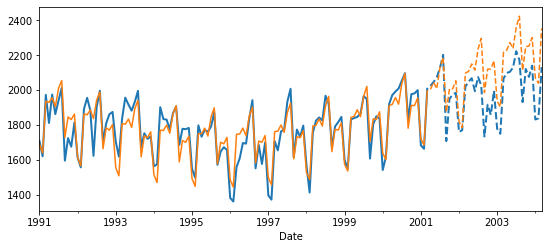

In [31]:
# Visulize Model4
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2)
valid_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2, linestyle='dashed')
rider_lm_trendseason.predict(train_df).plot(color='C1')
rider_lm_trendseason.predict(valid_df).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()


In [32]:
# Model 5: A simple moving average model
# For example, if rolling window=12, we will use the previous 11 periods average to forecast the 12th period
ma = train_ts.rolling(12).mean()

In [33]:
# Obtain the last moving average in the traing period
last_ma = ma[-1]

In [34]:
train_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2000-11-01    1981.408
2000-12-01    2000.153
2001-01-01    1683.148
2001-02-01    1663.404
2001-03-01    2007.928
Name: Ridership, Length: 123, dtype: float64

In [35]:
ma

Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
                 ...     
2000-11-01    1901.808000
2000-12-01    1915.451167
2001-01-01    1927.241833
2001-02-01    1931.114833
2001-03-01    1938.480667
Name: Ridership, Length: 123, dtype: float64

In [36]:
last_ma

1938.4806666666666

In [37]:
# Forecasting based on last_ma
predict_ma = pd.Series(last_ma,index=valid_ts.index)
predict_ma

Date
2001-04-01    1938.480667
2001-05-01    1938.480667
2001-06-01    1938.480667
2001-07-01    1938.480667
2001-08-01    1938.480667
2001-09-01    1938.480667
2001-10-01    1938.480667
2001-11-01    1938.480667
2001-12-01    1938.480667
2002-01-01    1938.480667
2002-02-01    1938.480667
2002-03-01    1938.480667
2002-04-01    1938.480667
2002-05-01    1938.480667
2002-06-01    1938.480667
2002-07-01    1938.480667
2002-08-01    1938.480667
2002-09-01    1938.480667
2002-10-01    1938.480667
2002-11-01    1938.480667
2002-12-01    1938.480667
2003-01-01    1938.480667
2003-02-01    1938.480667
2003-03-01    1938.480667
2003-04-01    1938.480667
2003-05-01    1938.480667
2003-06-01    1938.480667
2003-07-01    1938.480667
2003-08-01    1938.480667
2003-09-01    1938.480667
2003-10-01    1938.480667
2003-11-01    1938.480667
2003-12-01    1938.480667
2004-01-01    1938.480667
2004-02-01    1938.480667
2004-03-01    1938.480667
dtype: float64

In [39]:
# Evaluate Model5 performance
regressionSummary(valid_ts, predict_ma)


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 152.1767
            Mean Absolute Error (MAE) : 135.1550
          Mean Percentage Error (MPE) : 2.2278
Mean Absolute Percentage Error (MAPE) : 6.7771


In [40]:
# Model 6: Simple exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
SES = SimpleExpSmoothing(train_ts, initialization_method='estimated').fit()
predict_SES = SES.forecast(len(valid_ts))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [41]:
# Alpha and initial level are estimated by minimizing SSE
# Check the optimal model parameters
SES.model.params

{'smoothing_level': 0.13830494332741466,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1802.0164425537296,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
# Evaluate Model6 performance
regressionSummary(valid_ts,predict_SES)


Regression statistics

                      Mean Error (ME) : 109.0024
       Root Mean Squared Error (RMSE) : 179.0082
            Mean Absolute Error (MAE) : 160.6923
          Mean Percentage Error (MPE) : 4.9651
Mean Absolute Percentage Error (MAPE) : 7.9063
